In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import fitsio

mc_sr = "0000"
freq = "143"

map_febecop_lensed = hp.read_map(f"/global/cfs/cdirs/planck/data/ffp10/mc_cmb/{freq}/" + \
    f"febecop_ffp10_lensed_scl_cmb_143_mc_{mc_sr}.fits")
alm_febecop_lensed = hp.map2alm(map_febecop_lensed)
lensed_input_alm = hp.read_alm(f"/global/cfs/cdirs/planck/data/ffp10/sky/CMB/mc/scl/lensed/{freq}/" + 
    f"ffp10_lensed_scl_cmb_{freq}_alm_mc_{mc_sr}.fits").copy()  # endian problems, copy needed
bl = fitsio.read("/global/cfs/cdirs/sobs/users/xzackli/" + 
                 "BeamWf_HFI_R3.01/Bl_T_R3.01_fullsky_143x143.fits")['TEMPERATURE']

In [2]:
cl_febecop = hp.alm2cl(alm_febecop_lensed)
cl_input = hp.alm2cl(lensed_input_alm)

(0.0, 4000.0)

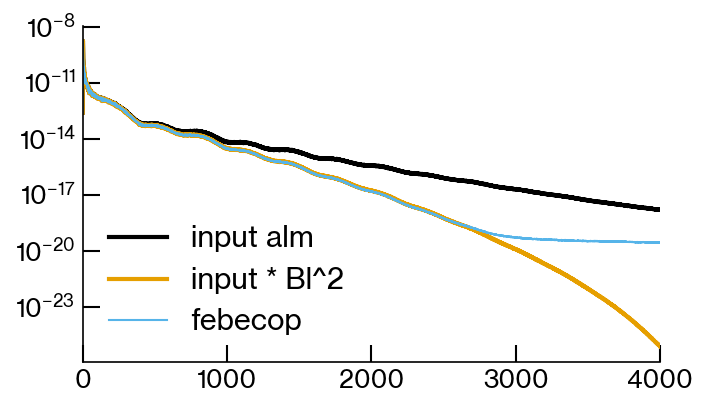

In [3]:
plt.figure(figsize=(5,3))
plt.plot(cl_input, label="input alm")
plt.plot(cl_input[:4001] * bl**2, label="input * Bl^2")
plt.plot(cl_febecop, label="febecop", lw=1)

plt.legend()
plt.yscale("log")
plt.xlim(0,4000)